In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [3]:
x.shape,y.shape

((100, 5), (100,))

In [4]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.098067,-1.377484,-2.696299,0.581478,3.237950,1
1,1.516576,-0.112226,1.475725,-1.240824,-0.179348,1
2,-0.401599,0.243878,-0.943756,-0.462329,-4.416042,0
3,0.727528,-1.965384,-0.504343,-1.510668,1.233098,0
4,3.769170,1.154462,-0.979808,-1.180460,2.195958,1


In [5]:
#  function for row sampling

def sample_row(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
#  function for featrure sampling

def sample_features(df,percent):
    cols = np.random.choice(df.columns[:-1], size=int(percent * (df.shape[1] - 1)), replace=False)
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [7]:
#  function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_row(df,row_percent)
    return sample_features(new_df,col_percent)

In [8]:
df1 = sample_row(df,0.2)

In [9]:
df2 = sample_row(df,0.2)

In [10]:
df3 = sample_row(df,0.2)

In [11]:
df3.shape

(20, 6)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[0] <= 0.113\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.4, 0.5, 'x[1] <= -0.643\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

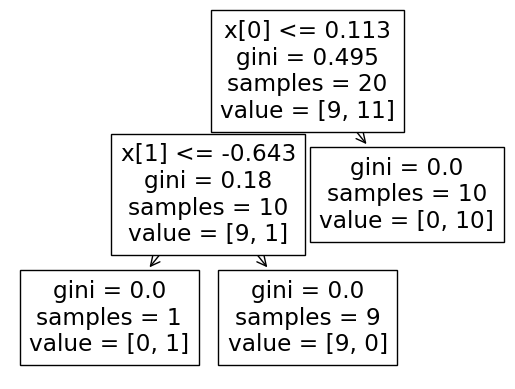

In [15]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[0] <= 0.422\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

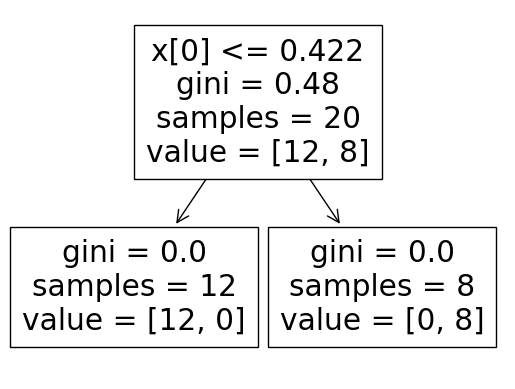

In [16]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.131\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[0] <= -1.158\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

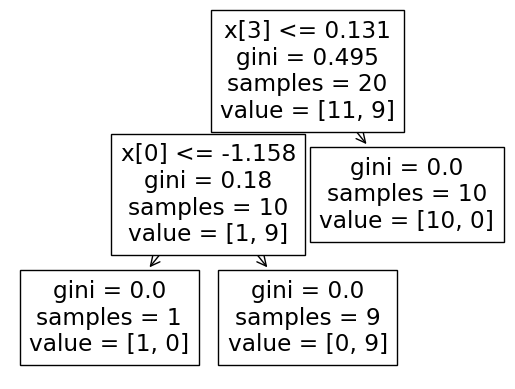

In [17]:
plot_tree(clf3)

In [18]:
x = pd.DataFrame(np.array([-0.958772,-0.401004,-0.302483,-1.550424,0.911690]).reshape(1,5),columns=['col1','col2','col3','col4','col5'])

In [19]:
x

,col1,col2,col3,col4,col5
0,-0.958772,-0.401004,-0.302483,-1.550424,0.91169


In [20]:
clf1.predict(x)

array([0])

In [21]:
clf2.predict(x)

array([0])

In [22]:
clf3.predict(x)

array([1])

In [23]:
#  now train by sampling features
df1 = sample_features(df,0.8)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11880\4042163097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:
df2 = sample_features(df,0.8)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11880\4042163097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
df3 = sample_features(df,0.8)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11880\4042163097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
df1.head()

,col4,col3,col1,col5,target
0,0.581478,-2.696299,3.098067,3.237950,1
1,-1.240824,1.475725,1.516576,-0.179348,1
2,-0.462329,-0.943756,-0.401599,-4.416042,0
3,-1.510668,-0.504343,0.727528,1.233098,0
4,-1.180460,-0.979808,3.769170,2.195958,1


In [27]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5555555555555556, 0.9285714285714286, 'x[0] <= 0.321\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[3] <= -0.845\ngini = 0.324\nsamples = 59\nvalue = [12, 47]'),
 Text(0.2222222222222222, 0.6428571428571429, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4444444444444444, 0.6428571428571429, 'x[2] <= -1.939\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5555555555555556, 0.5, 'x[0] <= 0.2\ngini = 0.078\nsamples = 49\nvalue = [2, 47]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[0] <= -1.408\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= -1.595\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.1111111111111111, 0.07142857142857142, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0

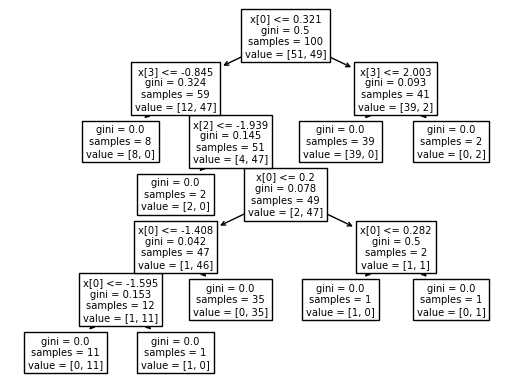

In [28]:
plot_tree(clf1)

[Text(0.453125, 0.9166666666666666, 'x[3] <= 0.185\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.1875, 0.75, 'x[1] <= 1.278\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= 0.494\ngini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 0.993\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.71875, 0.75, 'x[0] <= 1.246\ngini = 0.265\nsamples = 51\nvalue = [8, 43]'),
 Text(0.5625, 0.5833333333333334, 'x[3] <= 0.338\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.4375, 0.4166666666666667, 'x[3] <= 0.305\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.

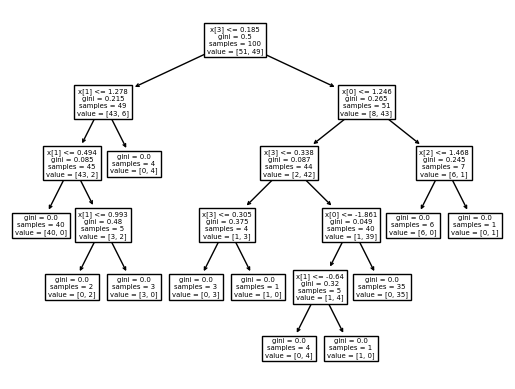

In [29]:
plot_tree(clf2)

[Text(0.453125, 0.9166666666666666, 'x[2] <= 0.185\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.1875, 0.75, 'x[0] <= 1.278\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.125, 0.5833333333333334, 'x[0] <= 0.494\ngini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[0] <= 0.993\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.71875, 0.75, 'x[3] <= 1.246\ngini = 0.265\nsamples = 51\nvalue = [8, 43]'),
 Text(0.5625, 0.5833333333333334, 'x[2] <= 0.338\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.4375, 0.4166666666666667, 'x[2] <= 0.305\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.

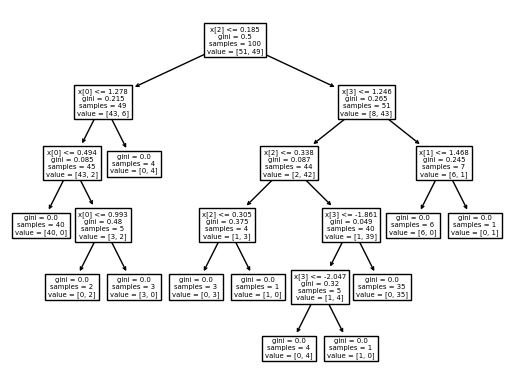

In [30]:
plot_tree(clf3)

In [31]:
clf1.predict(np.array([0.369039,1.253561,-0.066861,2.126981]).reshape(1,4))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
clf2.predict(np.array([0.369039,1.253561,-0.066861,2.126981]).reshape(1,4))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [33]:
clf3.predict(np.array([0.369039,1.253561,-0.066861,2.126981]).reshape(1,4))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [34]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11880\4042163097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [35]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11880\4042163097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [36]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11880\4042163097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
df1.head()

,col1,col2,target
47,-1.700671,1.518815,0
9,-0.390628,1.574623,0
57,1.286285,-1.073351,1
14,2.454203,-0.871687,1
22,0.499907,-1.253918,1


In [48]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[1] <= 0.513\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.3076923076923077, 0.7, 'x[1] <= 0.112\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.15384615384615385, 0.5, 'x[0] <= 0.719\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.23076923076923078, 0.3, 'x[0] <= 0.92\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.46153846153846156, 0.5, 'x[1] <= 0.348\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5384615384615384, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6923076923076923, 0.7, 'x[0] <= 0.192\ngini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.6153846153846154, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [1

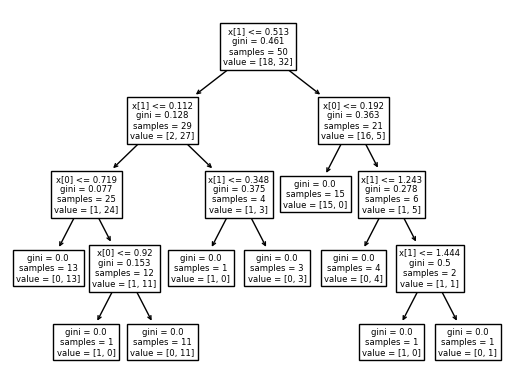

In [49]:
plot_tree(clf1)

[Text(0.5, 0.9375, 'x[0] <= 0.031\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.25, 0.8125, 'x[0] <= -1.054\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.125, 0.6875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.6875, 'x[0] <= -0.951\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.25, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5625, 'x[1] <= -0.762\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.375, 0.4375, 'x[0] <= -0.726\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.3125, 'x[0] <= -0.504\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.1875, 'x[1] <= -1.707\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.4375, 'gini = 0.0\nsa

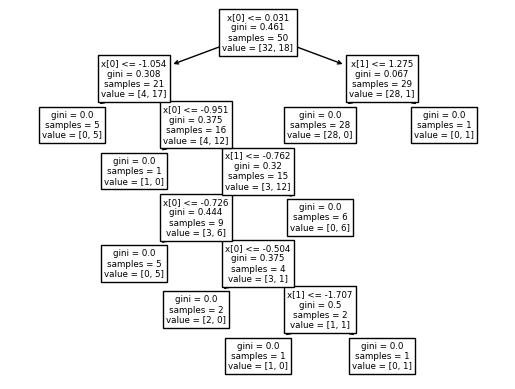

In [50]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.875, 'x[0] <= -0.549\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= -2.707\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= -0.784\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= -0.354\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

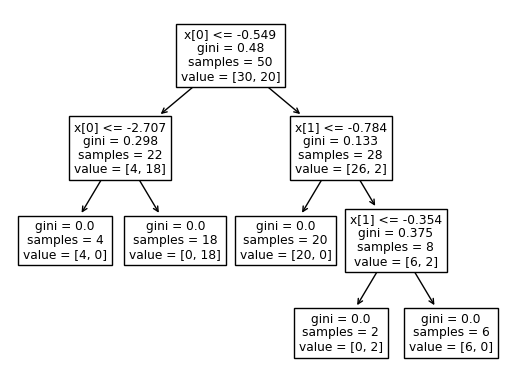

In [51]:
plot_tree(clf3)

In [52]:
clf1.predict(np.array([-1.700671,1.518815]).reshape(1,2))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [53]:
clf2.predict(np.array([-1.700671,1.518815]).reshape(1,2))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [54]:
clf3.predict(np.array([-1.700671,1.518815]).reshape(1,2))

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])